In [1]:
import pandas as pd
import json
import os

import sys
sys.path.append('../')

import dft_descriptors.numbering_CO as nb
from rdkit import Chem
from dft_descriptors.dft_featurize import *
from aqc_utils.molecule import molecule
from aqc_utils.db_functions import *
from aqc_utils.openbabel_functions import *

import hashlib
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
mol_df = db_select_molecules()
#mol_df.to_csv("../data_csv/mol_df.csv", sep=',',index=False)
#mol_df = pd.read_csv("../data_csv/mol_df.csv", sep=',')

/Users/julesschleinitz/Desktop/These/Projet_stage_M1_Max/Code/SM_DFT/DFT_for_SM/notebooks/../aqc_utils/db_functions.py:167: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = pd.concat([grouped['metadata', 'molecule_id', 'name'].first(),


In [3]:
sub_df = generates_descriptors(mol_df, "ligand")

CC(C)(C)OC(C=C1)=CC=C1C[C@H]2COC3=[N]2[Ni](C4=CC=C(C)C=C4)(Cl)[N]5=C3OC[C@@H]5CC6=CC=C(OC(C)(C)C)C=C6
CC(C)(C)OC(C=C1)=CC=C1C[C@H]2COC3=[N]2[Ni](F)(F)[N]4=C3OC[C@@H]4CC5=CC=C(OC(C)(C)C)C=C5
CC(C)[C@H]1CN(C2=CC=C(C(C)(C)C)C=C2)C3=[N]1[Ni](C4=CC=C(C)C=C4)(Cl)[N]5=C3N(C6=CC=C(C(C)(C)C)C=C6)C[C@@H]5C(C)C
CC(C)[C@H]1CN(C2=CC=C(C(C)(C)C)C=C2)C3=[N]1[Ni](F)(F)[N]4=C3N(C5=CC=C(C(C)(C)C)C=C5)C[C@@H]4C(C)C
CC(C)[C@H]1CN(C2=CC=CC(C(F)(F)F)=C2)C3=[N]1[Ni](C4=CC=C(C)C=C4)(Cl)[N]5=C3N(C6=CC(C(F)(F)F)=CC=C6)C[C@@H]5C(C)C
CC(C)[C@H]1CN(C2=CC=CC(C(F)(F)F)=C2)C3=[N]1[Ni](F)(F)[N]4=C3N(C5=CC(C(F)(F)F)=CC=C5)C[C@@H]4C(C)C
CC1(C)CN2C(C3=[N]4[C@@H](CC5=CC=CC=C5)CN3C1)=[N]([Ni]4(Cl)C6=CC=C(C)C=C6)[C@@H](CC7=CC=CC=C7)C2
Cl[Ni]1(C2=CC=C(C)C=C2)[N]3=C(OC[C@@H]3C(C4=CC=CC=C4)C5=CC=CC=C5)C6=[N]1[C@@H](C(C7=CC=CC=C7)C8=CC=CC=C8)CO6
Cl[Ni]1(C2=CC=C(C)C=C2)[N]3=C(OC[C@@H]3CC4=CC=C([N+]([O-])=O)C=C4)C5=[N]1[C@@H](CC6=CC=C([N+]([O-])=O)C=C6)CO5
Cl[Ni]1(C2=CC=C(C)C=C2)[N]3=C(OC[C@@H]3CC4=CNC5=C4C=CC=C5)C6=[N]1[C@@H](CC

UnboundLocalError: local variable 'full_df' referenced before assignment

In [40]:
sub_df

,number_of_atoms,charge,multiplicity,dipole,molar_mass,molar_volume,electronic_spatial_extent,E_scf,zero_point_correction,E_thermal_correction,...,ES_<S**2>_8,ES_<S**2>_9,at_0,at_1,at_2,at_3,at_4,at_5,at_6,at_7
COc1ccc2c(c1)CC[C@@H]1[C@@H]2CC[C@]2([C@@H]1CC[C@@H]2OC)C,50,0,1,2.267,300.44,2726.499,9129.5454,-929.402046,0.446961,0.467176,...,0.0,0.0,C,O,C,C,C,C,C,C
CCN(C(=O)Oc1ccc(cc1)F)CC,29,0,1,3.4772,211.2355,1693.039,4440.4923,-732.655926,0.237965,0.252853,...,0.0,0.0,C,O,C,C,C,C,C,C
CCN(C(=O)Oc1ccc2c(n1)cccc2)CC,34,0,1,1.4772,244.2926,2616.971,6510.8351,-803.103755,0.281322,0.297804,...,0.0,0.0,C,O,C,N,C,C,C,C
CCN(C(=O)Oc1ccccn1)CC,28,0,1,1.5282,194.2328,1566.464,3648.3551,-649.461017,0.234617,0.24849,...,0.0,0.0,C,O,C,N,C,C,C,C
CCN(C(=O)Oc1cccnc1)CC,28,0,1,4.6412,194.2328,1566.328,3560.8409,-649.456117,0.234386,0.248347,...,0.0,0.0,C,O,C,C,C,C,N,C
CCN(C(=O)Oc1ccncc1)CC,28,0,1,4.5186,194.2328,1829.524,3616.9194,-649.459989,0.234624,0.248529,...,0.0,0.0,C,O,C,C,C,N,C,C
CCN(C(=O)Oc1csc2c1cccc2)CC,32,0,1,3.0984,249.327,1935.674,5533.1901,-1107.821373,0.259929,0.276313,...,0.0,0.0,C,O,C,C,S,C,C,C
CCN(C(=O)Oc1cscc1)CC,26,0,1,2.6198,199.2672,1608.668,3644.9158,-954.17128,0.212656,0.226372,...,0.0,0.0,C,O,C,C,S,C,C,C
COc1ccccn1,15,0,1,0.9592,109.1274,877.23,930.0049,-362.817798,0.121948,0.128726,...,0.0,0.0,C,O,C,N,C,C,C,C
OC1CCOc2c1cccc2,21,0,1,2.3075,150.1768,1194.094,1586.2819,-499.409301,0.174664,0.183369,...,0.0,0.0,C,O,C,C,C,C,C,C


In [19]:
sub_df

,number_of_atoms,charge,multiplicity,dipole,molar_mass,molar_volume,electronic_spatial_extent,E_scf,zero_point_correction,E_thermal_correction,...,ES_<S**2>_8,ES_<S**2>_9,at_0,at_1,at_2,at_3,at_4,at_5,at_6,at_7
COc1ccc2c(c1)CC[C@@H]1[C@@H]2CC[C@]2([C@@H]1CC[C@@H]2OC)C,50,0,1,2.267,300.44,2726.499,9129.5454,-929.402046,0.446961,0.467176,...,0.0,0.0,C,O,C,C,C,C,C,C
CCN(C(=O)Oc1ccc(cc1)F)CC,29,0,1,3.4772,211.2355,1693.039,4440.4923,-732.655926,0.237965,0.252853,...,0.0,0.0,C,O,C,C,C,C,C,C
CCN(C(=O)Oc1ccc2c(n1)cccc2)CC,34,0,1,1.4772,244.2926,2616.971,6510.8351,-803.103755,0.281322,0.297804,...,0.0,0.0,C,O,C,N,C,C,C,C
CCN(C(=O)Oc1ccccn1)CC,28,0,1,1.5282,194.2328,1566.464,3648.3551,-649.461017,0.234617,0.24849,...,0.0,0.0,C,O,C,N,C,C,C,C
CCN(C(=O)Oc1cccnc1)CC,28,0,1,4.6412,194.2328,1566.328,3560.8409,-649.456117,0.234386,0.248347,...,0.0,0.0,C,O,C,C,C,C,N,C
CCN(C(=O)Oc1ccncc1)CC,28,0,1,4.5186,194.2328,1829.524,3616.9194,-649.459989,0.234624,0.248529,...,0.0,0.0,C,O,C,C,C,N,C,C
CCN(C(=O)Oc1csc2c1cccc2)CC,32,0,1,3.0984,249.327,1935.674,5533.1901,-1107.821373,0.259929,0.276313,...,0.0,0.0,C,O,C,C,S,C,C,C
CCN(C(=O)Oc1cscc1)CC,26,0,1,2.6198,199.2672,1608.668,3644.9158,-954.17128,0.212656,0.226372,...,0.0,0.0,C,O,C,C,S,C,C,C
COc1ccccn1,15,0,1,0.9592,109.1274,877.23,930.0049,-362.817798,0.121948,0.128726,...,0.0,0.0,C,O,C,N,C,C,C,C
OC1CCOc2c1cccc2,21,0,1,2.3075,150.1768,1194.094,1586.2819,-499.409301,0.174664,0.183369,...,0.0,0.0,C,O,C,C,C,C,C,C


In [21]:
sub_df["at_0"].unique()

array(['C'], dtype=object)

In [34]:
#sub_df.to_csv('../data_csv/AX_dft.csv', index= True)

In [56]:
df = pd.read_csv('../data_csv/substrate_dft.csv', sep = ',', index_col=0)
df

,number_of_atoms,charge,multiplicity,dipole,molar_mass,molar_volume,electronic_spatial_extent,E_scf,zero_point_correction,E_thermal_correction,...,ES_<S**2>_8,ES_<S**2>_9,at_0,at_1,at_2,at_3,at_4,at_5,at_6,at_7
COc1ccc(cc1)C,19,0,1,1.2759,122.1664,1114.154,1408.3705,-386.087013,0.161012,0.168919,...,0.0,0.0,C,O,C,C,C,C,C,C
COc1ccc2c(c1)cccc2,22,0,1,1.1745,158.1994,1421.914,2212.0661,-500.411772,0.180620,0.189995,...,0.0,0.0,C,O,C,C,C,C,C,C
OCCc1ccc(cc1)OC,23,0,1,2.2007,152.1926,1340.848,2603.3111,-500.604058,0.194937,0.205938,...,0.0,0.0,C,O,C,C,C,C,C,C
OCc1ccc(cc1)OC,20,0,1,1.0039,138.1658,1325.584,1864.2988,-461.288270,0.166201,0.175860,...,0.0,0.0,C,O,C,C,C,C,C,C
CC(Oc1ccc2c(c1)cccc2)C,28,0,1,1.1931,186.2530,2191.741,3471.5787,-579.046324,0.236925,0.249092,...,0.0,0.0,C,O,C,C,C,C,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OCCOc1ccc(cc1)C,23,0,1,0.9004,152.1926,1148.843,2705.9796,-500.604859,0.194140,0.205551,...,0.0,0.0,C,O,C,C,C,C,C,C
OCCOc1ccccc1,20,0,1,1.1955,138.1658,1239.085,2080.4679,-461.289750,0.166742,0.176185,...,0.0,0.0,C,O,C,C,C,C,C,C
OCCc1ccccc1OC,23,0,1,1.9730,152.1926,1251.738,2041.5512,-500.602035,0.195195,0.206090,...,0.0,0.0,C,O,C,C,C,C,C,C
O=C(N(C)C)Oc1ccc2c(c1)cc(cc2)OC(C)(C)C,42,0,1,1.8095,287.3578,2456.636,10257.5832,-940.893091,0.351925,0.373050,...,0.0,0.0,C,O,C,C,C,C,C,C


In [57]:
df = df.append(sub_df)
df

,number_of_atoms,charge,multiplicity,dipole,molar_mass,molar_volume,electronic_spatial_extent,E_scf,zero_point_correction,E_thermal_correction,...,ES_<S**2>_8,ES_<S**2>_9,at_0,at_1,at_2,at_3,at_4,at_5,at_6,at_7
COc1ccc(cc1)C,19,0,1,1.2759,122.1664,1114.154,1408.3705,-386.087013,0.161012,0.168919,...,0.0,0.0,C,O,C,C,C,C,C,C
COc1ccc2c(c1)cccc2,22,0,1,1.1745,158.1994,1421.914,2212.0661,-500.411772,0.18062,0.189995,...,0.0,0.0,C,O,C,C,C,C,C,C
OCCc1ccc(cc1)OC,23,0,1,2.2007,152.1926,1340.848,2603.3111,-500.604058,0.194937,0.205938,...,0.0,0.0,C,O,C,C,C,C,C,C
OCc1ccc(cc1)OC,20,0,1,1.0039,138.1658,1325.584,1864.2988,-461.28827,0.166201,0.17586,...,0.0,0.0,C,O,C,C,C,C,C,C
CC(Oc1ccc2c(c1)cccc2)C,28,0,1,1.1931,186.253,2191.741,3471.5787,-579.046324,0.236925,0.249092,...,0.0,0.0,C,O,C,C,C,C,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c1ccc2c(c1)OCC2,17,0,1,1.5696,120.1506,984.086,1044.2564,-384.880341,0.140934,0.147617,...,0.0,0.0,C,O,C,C,C,C,C,C
c1ccc2c(c1)cc1c(c2)oc2c1cc1ccccc1c2,33,0,1,0.8459,268.3142,2051.181,7791.9681,-844.603002,0.258081,0.271954,...,0.0,0.0,C,O,C,C,C,C,C,C
c1ccc2c(c1)oc1c2cccc1,21,0,1,0.6462,168.1946,1731.214,2262.2973,-537.327117,0.164729,0.173236,...,0.0,0.0,C,O,C,C,C,C,C,C
CC(=O)Oc1ccc2c(c1)ccc(c2)OC(=O)C,30,0,1,2.2288,244.2464,2208.592,6858.5301,-841.638394,0.231237,0.247639,...,0.0,0.0,C,O,C,C,C,C,C,C


In [58]:
#df.to_csv('../data_csv/substrate_dft.csv', sep=',', index=True)

In [63]:
Chem.CanonSmiles("CC(=O)Oc1ccc2c(c1)ccc(c2)OC(=O)C")

'CC(=O)Oc1ccc2cc(OC(C)=O)ccc2c1'

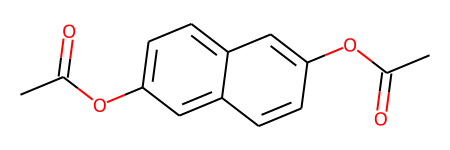

In [64]:
Chem.MolFromSmiles("CC(=O)Oc1ccc2c(c1)ccc(c2)OC(=O)C")